# 손실함수

# 평균 제곱 오차


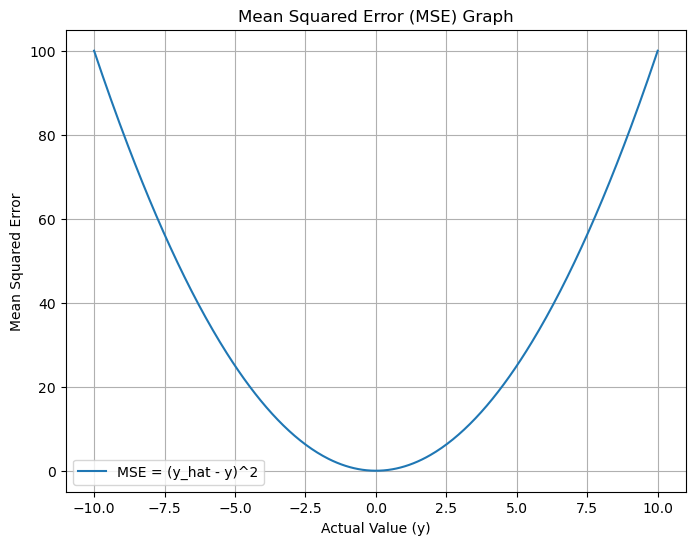

In [3]:
import matplotlib.pyplot as plt

import numpy as np
# 예측 값(y_hat) 고정
y_hat = 0

# 실제 값(y) 범위 생성
y_values = np.linspace(-10, 10, 400)

# 평균 제곱 오차 계산
mse_values = (y_values - y_hat) ** 2

# 그래프 재생성
plt.figure(figsize=(8, 6))
plt.plot(y_values, mse_values, label='MSE = (y_hat - y)^2')
plt.title('Mean Squared Error (MSE) Graph')
plt.xlabel('Actual Value (y)')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()


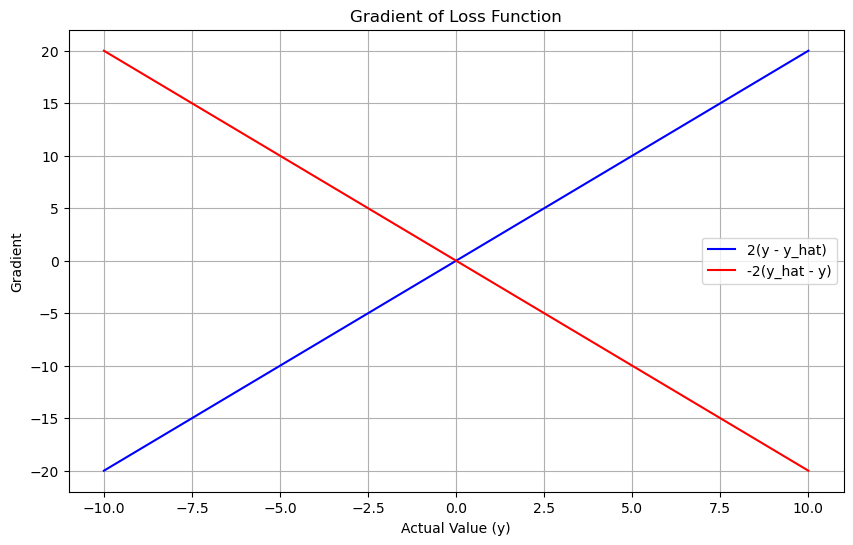

In [2]:
# 예측 값(y_hat) 고정
y_hat = 0

# 실제 값(y) 범위 생성
y_values = np.linspace(-10, 10, 400)

# 실제 값에서 예측 값을 뺀 경우의 미분
grad_y_minus_yhat = 2 * (y_values - y_hat)

# 예측 값에서 실제 값을 뺀 경우의 미분
grad_yhat_minus_y = -2 * (y_values - y_hat)

# 그래프 생성
plt.figure(figsize=(10, 6))
plt.plot(y_values, grad_y_minus_yhat, label='2(y - y_hat)', color='blue')
plt.plot(y_values, grad_yhat_minus_y, label='-2(y_hat - y)', color='red')
plt.title('Gradient of Loss Function')
plt.xlabel('Actual Value (y)')
plt.ylabel('Gradient')
plt.legend()
plt.grid(True)
plt.show()


# 정규화


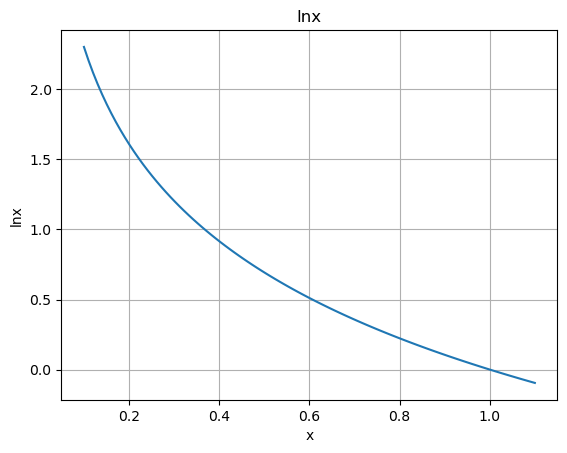

In [13]:
x = np.linspace(0.1, 1.1, 100)

y = -np.log(x)

plt.plot(x,y)
plt.title('lnx')
plt.ylabel('lnx')
plt.xlabel('x')
plt.grid(True)
plt.show()


delta = 1e-7


# 미니배치

In [19]:
from mnist import load_mnist
import sys, os
import numpy as np

(x_train, t_train), (x_test, t_test) = load_mnist(normalize= True, one_hot_label =True)

print(x_train.shape[0])
print(t_train.shape)



60000
(60000, 10)


# batch_mask =np.random.choice()

In [22]:
x, t = x_train, t_train

print(f'x.size: {x.size}')
print(f'x.shape: {x.shape}')

x.size: 47040000
x.shape: (60000, 784)


In [24]:
train_size = x_train.shape[0]
batch_size =10
batch_mask = np.random.choice(train_size, batch_size)

x_batch = x[batch_mask]
t_batch = t[batch_mask]

x_batch.shape

(10, 784)

In [28]:
x_train.shape[0]

60000

: 

if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)

batch_size = y.shape[0]
return -np.sum(t * np.log(y))/ batch_size

-np.sum(t * np.log(y[np.arange(batch_size), t]))

# 반올림 오차 1e-50 
# 중심 차분
# 수치 미분

# 편미분 

x0 = 3.0
x1 = 4.0
f(x0, x1) = x0 **2 + x1 **2
def function_tmp1(x0):
    return x0*x0 + 4.0 **2.0 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


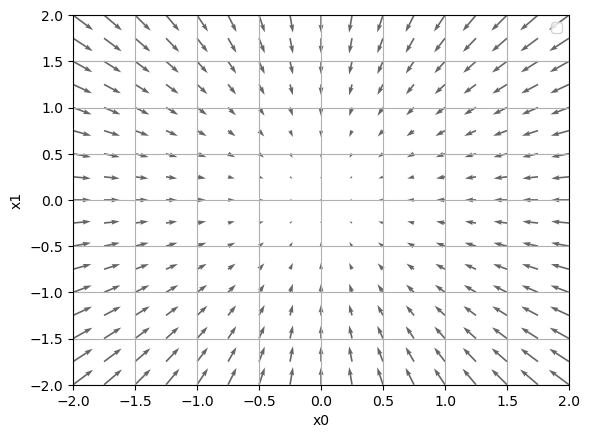

In [1]:
# coding: utf-8
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()

# 극솟값

# 안장점

# x0 = x0 - n(파라미터에 대한 손실함수의 기울기)

# 학습률 in 하이퍼 파라미터 


In [2]:
def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad

In [6]:
class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

In [5]:
from mnist import load_mnist


(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

AttributeError: 'TwoLayerNet' object has no attribute 'gradient'